## Análise de Convergência dos estados brasileiros considerando indicadores dos programas MDS

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
import csv
import json

In [2]:
!pip install --upgrade matplotlib --quiet

In [3]:
!pip install --upgrade seaborn --quiet

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import seaborn as sns

In [8]:
arquivo = "tac_estadual.csv"

caminho_completo = os.path.abspath(arquivo)
print("O caminho completo para o arquivo é:", caminho_completo)

O caminho completo para o arquivo é: D:\docs_mariana\ProjetosGit\Convergencia\tac_estadual.csv


In [9]:
import pandas as pd

# Corrigindo o caminho do arquivo
tac_estadual = r'D:\docs_mariana\ProjetosGit\Convergencia\tac_estadual.csv'

# Carregando o arquivo CSV
tac_est = pd.read_csv(tac_estadual, sep=',', encoding='latin-1')

# Visualizando as primeiras linhas para verificar se foi carregado corretamente
tac_est.head()

,Código,Unidade Territorial,Referência,Quantidade total de famílias com cadastro atualizado,Média geral de atualização de todo o cadastro,"Quantidade de famílias em situação de pobreza, segundo a faixa do Programa Bolsa Família*, com cadastro atualizado",Quantidade de famílias de baixa renda** com cadastro atualizado,Quantidade de famílias com renda per capita mensal até meio salário mínimo (Pobreza + Baixa renda) com cadastro atualizado,Quantidade de famílias com renda per capita mensal maior que meio salário-mínimo*** com cadastro atualizado,Quantidade de famílias com renda zero com cadastro atualizado,TAC - Taxa de atualização cadastral das famílias com renda per capita mensal até meio salário mínimo (Pobreza + Baixa renda)
0,11,RONDÔNIA,04/2015,164429,"67,38",98951.0,37719.0,136670,27759.0,6323.0,"68,24"
1,12,ACRE,04/2015,99938,"79,52",82854.0,12493.0,95347,4591.0,18166.0,"80,10"
2,13,AMAZONAS,04/2015,443263,"77,15",361309.0,55949.0,417258,26005.0,35436.0,"78,79"
3,14,RORAIMA,04/2015,66987,"76,09",48007.0,11544.0,59551,7436.0,4953.0,"76,34"
4,15,PARÁ,04/2015,1060889,"77,98",866999.0,118761.0,985760,75129.0,71816.0,"78,95"


In [10]:
tac_est.columns

Index(['Código', 'Unidade Territorial', 'Referência',
       'Quantidade total de famílias com cadastro atualizado',
       'Média geral de atualização de todo o cadastro',
       'Quantidade de famílias em situação de pobreza, segundo a faixa do Programa Bolsa Família*, com cadastro atualizado',
       'Quantidade de famílias de baixa renda** com cadastro atualizado',
       'Quantidade de famílias com renda per capita mensal até meio salário mínimo (Pobreza + Baixa renda) com cadastro atualizado',
       'Quantidade de famílias com renda per capita mensal maior que meio salário-mínimo*** com cadastro atualizado',
       'Quantidade de famílias com renda zero com cadastro atualizado',
       'TAC - Taxa de atualização cadastral das famílias com renda per capita mensal até meio salário mínimo (Pobreza + Baixa renda)'],
      dtype='object')

In [11]:
tac_est = tac_est.drop(columns=['Código', 'Quantidade total de famílias com cadastro atualizado',
       'Média geral de atualização de todo o cadastro',
       'Quantidade de famílias em situação de pobreza, segundo a faixa do Programa Bolsa Família*, com cadastro atualizado',
       'Quantidade de famílias de baixa renda** com cadastro atualizado',
       'Quantidade de famílias com renda per capita mensal até meio salário mínimo (Pobreza + Baixa renda) com cadastro atualizado',
       'Quantidade de famílias com renda per capita mensal maior que meio salário-mínimo*** com cadastro atualizado',
       'Quantidade de famílias com renda zero com cadastro atualizado'])

In [12]:
tac_est.head()

,Unidade Territorial,Referência,TAC - Taxa de atualização cadastral das famílias com renda per capita mensal até meio salário mínimo (Pobreza + Baixa renda)
0,RONDÔNIA,04/2015,"68,24"
1,ACRE,04/2015,"80,10"
2,AMAZONAS,04/2015,"78,79"
3,RORAIMA,04/2015,"76,34"
4,PARÁ,04/2015,"78,95"


In [13]:
tac_est.columns

Index(['Unidade Territorial', 'Referência',
       'TAC - Taxa de atualização cadastral das famílias com renda per capita mensal até meio salário mínimo (Pobreza + Baixa renda)'],
      dtype='object')

In [14]:
tac_est = tac_est.rename(columns={'TAC - Taxa de atualização cadastral das famílias com renda per capita mensal até meio salário mínimo (Pobreza + Baixa renda)': 'TAC'})

In [15]:
tac_est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unidade Territorial  2916 non-null   object
 1   Referência           2916 non-null   object
 2   TAC                  2916 non-null   object
dtypes: object(3)
memory usage: 68.5+ KB


In [16]:
tac_est.head()

,Unidade Territorial,Referência,TAC
0,RONDÔNIA,04/2015,"68,24"
1,ACRE,04/2015,"80,10"
2,AMAZONAS,04/2015,"78,79"
3,RORAIMA,04/2015,"76,34"
4,PARÁ,04/2015,"78,95"


In [17]:
tac_est['TAC'] = pd.to_numeric(tac_est['TAC'].str.replace(',', '.'))

In [18]:
tac_est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unidade Territorial  2916 non-null   object 
 1   Referência           2916 non-null   object 
 2   TAC                  2916 non-null   float64
dtypes: float64(1), object(2)
memory usage: 68.5+ KB


In [19]:
tac_est.head()

,Unidade Territorial,Referência,TAC
0,RONDÔNIA,04/2015,68.24
1,ACRE,04/2015,80.10
2,AMAZONAS,04/2015,78.79
3,RORAIMA,04/2015,76.34
4,PARÁ,04/2015,78.95


In [20]:
tac_est['Referência'] = pd.to_datetime(tac_est['Referência'], format='%m/%Y')

In [21]:
tac_est.head()

,Unidade Territorial,Referência,TAC
0,RONDÔNIA,2015-04-01,68.24
1,ACRE,2015-04-01,80.10
2,AMAZONAS,2015-04-01,78.79
3,RORAIMA,2015-04-01,76.34
4,PARÁ,2015-04-01,78.95


In [22]:
tac_est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unidade Territorial  2916 non-null   object        
 1   Referência           2916 non-null   datetime64[ns]
 2   TAC                  2916 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 68.5+ KB


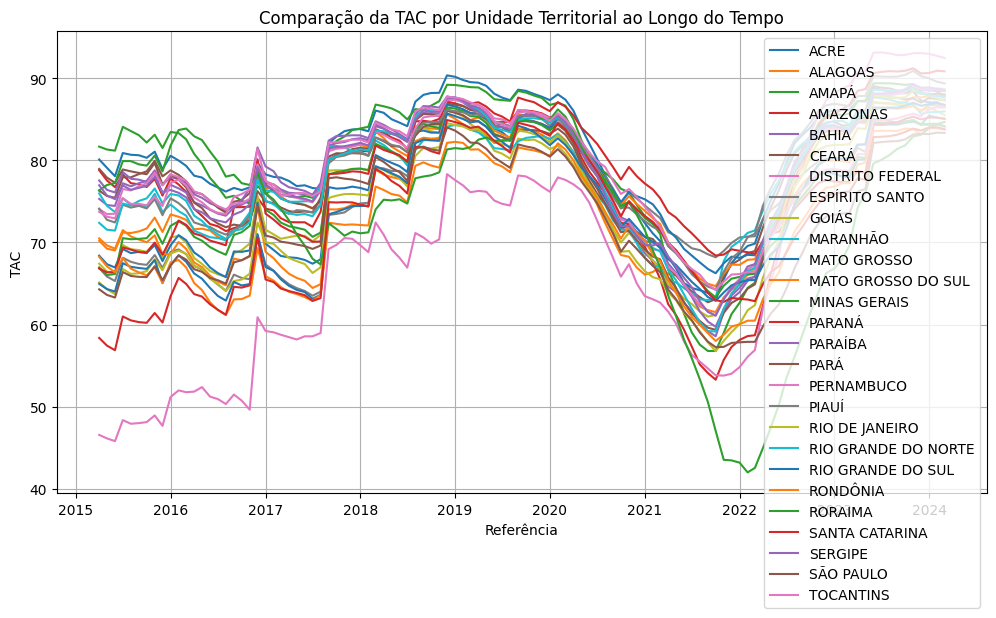

In [23]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Iterando sobre cada 'Unidade Territorial'
for território, dados_território in tac_est.groupby('Unidade Territorial'):
    plt.plot(dados_território['Referência'], dados_território['TAC'], label=território)

# Adicionando título e rótulos aos eixos
plt.title('Comparação da TAC por Unidade Territorial ao Longo do Tempo')
plt.xlabel('Referência')
plt.ylabel('TAC')
plt.legend()
plt.grid(True)

plt.show()


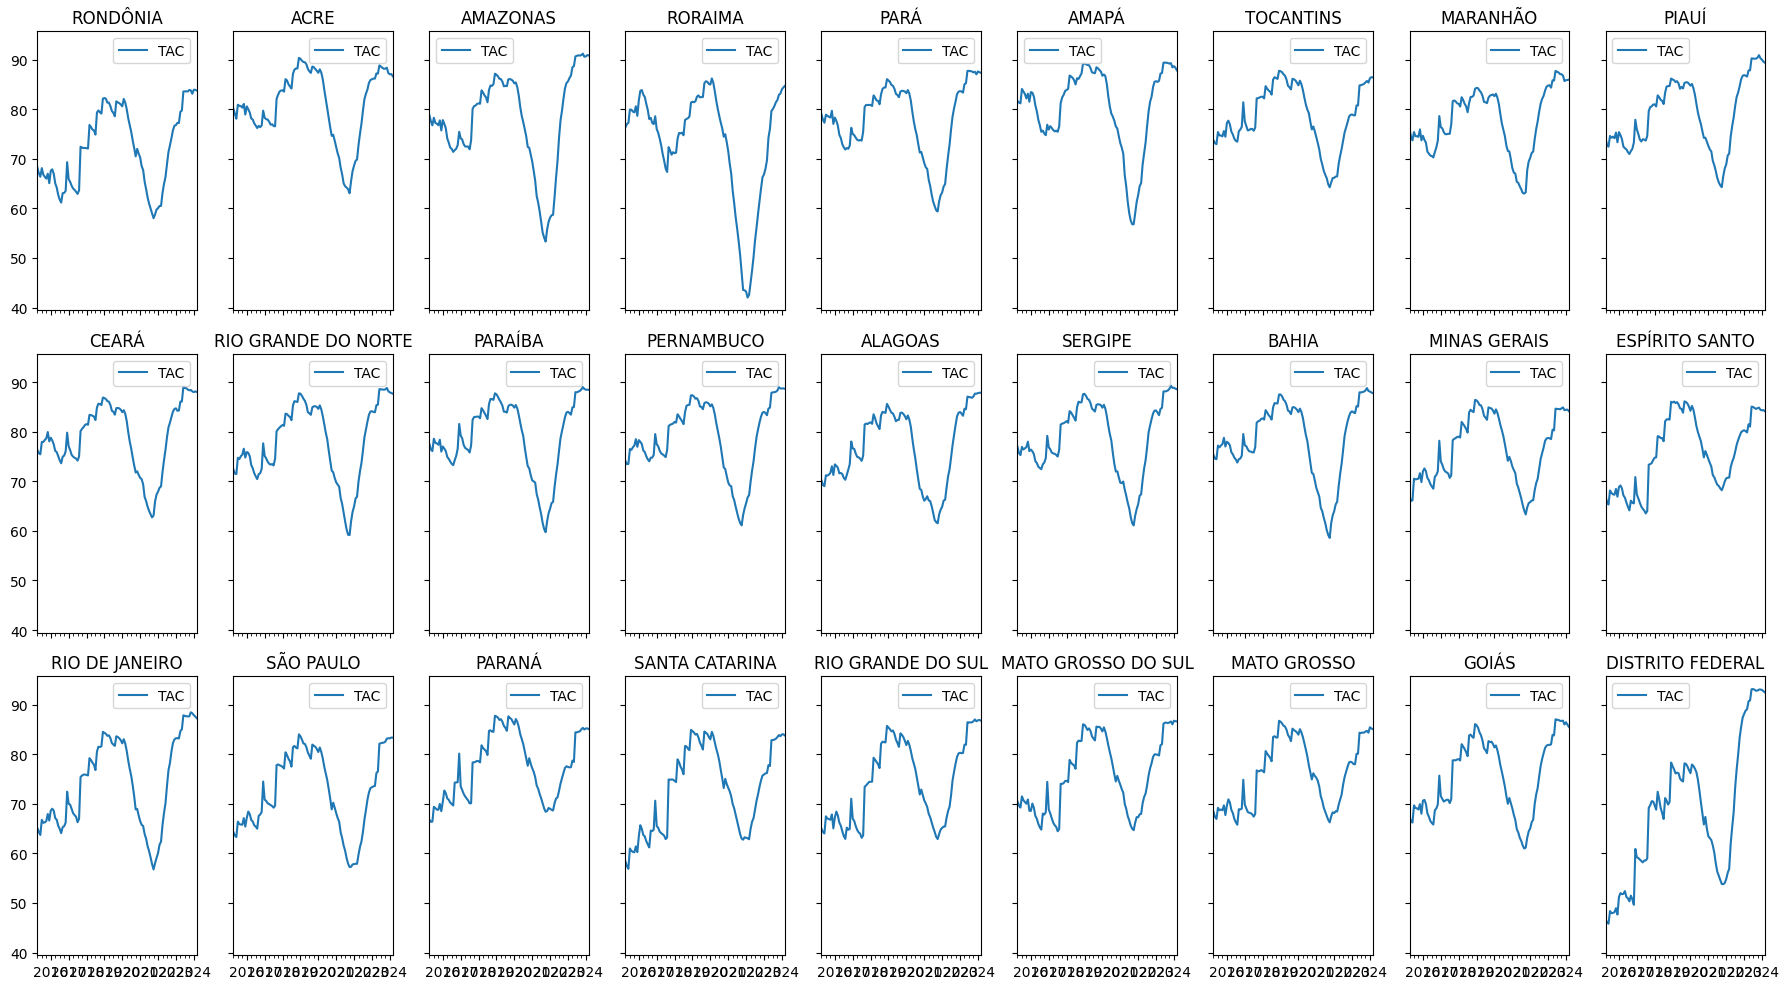

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Obter lista de unidades territoriais únicas
unidades_territoriais = tac_est['Unidade Territorial'].unique()

# Criar uma matriz de 3x9 para os subplots
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(18, 10), sharex=True, sharey=True)

# Iterar sobre cada unidade territorial e plotar um gráfico para cada uma delas
for idx, territorial in enumerate(unidades_territoriais):
    row = idx // 9  # Calcula a linha atual
    col = idx % 9   # Calcula a coluna atual
    ax = axes[row, col]  # Obtém o subplot atual
    
    # Filtrar os dados para a unidade territorial atual
    data = tac_est[tac_est['Unidade Territorial'] == territorial]
    
    # Plotar o gráfico de linhas para a unidade territorial atual
    data.plot(kind='line', x='Referência', y='TAC', ax=ax, title=territorial)
    
    # Remover rótulos do eixo x e y para manter o layout limpo
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar o layout
plt.tight_layout()

plt.show()


In [25]:
arquivo = "data"

caminho_completo = os.path.abspath(arquivo)
print("O caminho completo para o arquivo é:", caminho_completo)

O caminho completo para o arquivo é: D:\docs_mariana\ProjetosGit\Convergencia\data


In [26]:
#criando arquivo csv final
tac_est.to_csv('D:/docs_mariana/ProjetosGit/Convergencia/tac_est.csv', encoding='UTF-8')

In [27]:
import pandas as pd

# Corrigindo o caminho do arquivo
pbf_unip_estadual = r'D:\docs_mariana\ProjetosGit\Convergencia\BBF_unip_estadual.csv'

# Carregando o arquivo CSV
pbf_unip_estadual = pd.read_csv(pbf_unip_estadual, sep=',', encoding='latin-1')

# Visualizando as primeiras linhas para verificar se foi carregado corretamente
pbf_unip_estadual.head()

,Código,Unidade Territorial,Referência,Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 1 integrante,Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 2 integrantes,Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 3 integrantes,Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 4 integrantes,Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 5 integrantes,Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 6 integrantes,Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 7 integrantes,Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 8 ou mais integrantes,Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 1 integrante,Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 2 integrantes,Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 3 integrantes,Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 4 integrantes,Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 5 integrantes,Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 6 integrantes,Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 7 integrantes,Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 8 ou mais integrantes
0,11,RONDÔNIA,12/2012,23465,27972,26199,18609,8015,2334,688,284,2416,16951,32859,34489,18969,6743,2361,1257
1,12,ACRE,12/2012,3394,9251,12745,8903,4279,1702,635,387,441,5786,13856,16898,13253,8093,4637,5160
2,13,AMAZONAS,12/2012,34114,47277,43066,26331,12288,4774,1771,1129,5352,47814,76398,76006,54969,32443,17293,15897
3,14,RORAIMA,12/2012,5463,7019,6074,3856,1713,658,199,123,1677,8373,11366,10803,7198,3749,1846,1587
4,15,PARÁ,12/2012,75278,102071,93070,59319,27207,9737,3417,1964,13311,133584,212759,198425,125908,63640,30409,26622


In [28]:
pbf_unip_estadual.columns

Index(['Código', 'Unidade Territorial', 'Referência',
       'Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 1 integrante',
       'Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 2 integrantes',
       'Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 3 integrantes',
       'Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 4 integrantes',
       'Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 5 integrantes',
       'Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 6 integrantes',
       'Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 7 integrantes',
       'Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 8 ou mais integrantes',
       'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 1 integrante',
       'Quantidad

In [29]:
pbf_unip_estadual = pbf_unip_estadual.drop(columns=['Código', 'Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 1 integrante', 
                                                  'Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 2 integrantes',
  'Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 3 integrantes',
   'Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 4 integrantes',
    'Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 5 integrantes',
     'Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 6 integrantes',
      'Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 7 integrantes',
    'Quantidade de famílias NÃO beneficiárias do Programa Bolsa Família formada por 8 ou mais integrantes'])

In [30]:
pbf_unip_estadual.head()

,Unidade Territorial,Referência,Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 1 integrante,Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 2 integrantes,Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 3 integrantes,Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 4 integrantes,Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 5 integrantes,Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 6 integrantes,Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 7 integrantes,Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 8 ou mais integrantes
0,RONDÔNIA,12/2012,2416,16951,32859,34489,18969,6743,2361,1257
1,ACRE,12/2012,441,5786,13856,16898,13253,8093,4637,5160
2,AMAZONAS,12/2012,5352,47814,76398,76006,54969,32443,17293,15897
3,RORAIMA,12/2012,1677,8373,11366,10803,7198,3749,1846,1587
4,PARÁ,12/2012,13311,133584,212759,198425,125908,63640,30409,26622


In [31]:
pbf_unip_estadual.columns

Index(['Unidade Territorial', 'Referência',
       'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 1 integrante',
       'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 2 integrantes',
       'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 3 integrantes',
       'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 4 integrantes',
       'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 5 integrantes',
       'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 6 integrantes',
       'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 7 integrantes',
       'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 8 ou mais integrantes'],
      dtype='object')

In [32]:
pbf_unip_estadual = pbf_unip_estadual.rename(columns={'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 1 integrante': 
                                                      'qtd familias PBF 1 integrante',
       'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 2 integrantes': 'qtd familias PBF 2 integrantes',
       'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 3 integrantes': 'qtd familias PBF 3 integrantes',
       'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 4 integrantes': 'qtd familias PBF 4 integrantes',
       'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 5 integrantes': 'qtd familias PBF 5 integrantes',
       'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 6 integrantes': 'qtd familias PBF 6 integrantes',
       'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 7 integrantes': 'qtd familias PBF 7 integrantes',
       'Quantidade de famílias BENEFICIÁRIAS do Programa Bolsa Família formada por 8 ou mais integrantes': 'qtd familias PBF 8+ integrantes'})

In [33]:
pbf_unip_estadual.columns

Index(['Unidade Territorial', 'Referência', 'qtd familias PBF 1 integrante',
       'qtd familias PBF 2 integrantes', 'qtd familias PBF 3 integrantes',
       'qtd familias PBF 4 integrantes', 'qtd familias PBF 5 integrantes',
       'qtd familias PBF 6 integrantes', 'qtd familias PBF 7 integrantes',
       'qtd familias PBF 8+ integrantes'],
      dtype='object')

In [34]:
# Lista das colunas a serem somadas
colunas_somadas = ['qtd familias PBF 1 integrante',
       'qtd familias PBF 2 integrantes', 'qtd familias PBF 3 integrantes',
       'qtd familias PBF 4 integrantes', 'qtd familias PBF 5 integrantes',
       'qtd familias PBF 6 integrantes', 'qtd familias PBF 7 integrantes',
       'qtd familias PBF 8+ integrantes']

# Adiciona uma nova coluna chamada "Soma" com a soma das colunas selecionadas
pbf_unip_estadual['total fam'] = pbf_unip_estadual[colunas_somadas].sum(axis=1)

In [35]:
pbf_unip_estadual.head()

,Unidade Territorial,Referência,qtd familias PBF 1 integrante,qtd familias PBF 2 integrantes,qtd familias PBF 3 integrantes,qtd familias PBF 4 integrantes,qtd familias PBF 5 integrantes,qtd familias PBF 6 integrantes,qtd familias PBF 7 integrantes,qtd familias PBF 8+ integrantes,total fam
0,RONDÔNIA,12/2012,2416,16951,32859,34489,18969,6743,2361,1257,116045
1,ACRE,12/2012,441,5786,13856,16898,13253,8093,4637,5160,68124
2,AMAZONAS,12/2012,5352,47814,76398,76006,54969,32443,17293,15897,326172
3,RORAIMA,12/2012,1677,8373,11366,10803,7198,3749,1846,1587,46599
4,PARÁ,12/2012,13311,133584,212759,198425,125908,63640,30409,26622,804658


In [36]:
pbf_unip_estadual.columns

Index(['Unidade Territorial', 'Referência', 'qtd familias PBF 1 integrante',
       'qtd familias PBF 2 integrantes', 'qtd familias PBF 3 integrantes',
       'qtd familias PBF 4 integrantes', 'qtd familias PBF 5 integrantes',
       'qtd familias PBF 6 integrantes', 'qtd familias PBF 7 integrantes',
       'qtd familias PBF 8+ integrantes', 'total fam'],
      dtype='object')

In [37]:
# Nome das colunas
coluna1 = 'qtd familias PBF 1 integrante'
coluna2 = 'total fam'

# Calcula o percentual da coluna1 em relação à coluna2
pbf_unip_estadual['Percentual fam unip pbf'] = ((pbf_unip_estadual[coluna1] / pbf_unip_estadual[coluna2]) * 100).round(2)

In [38]:
pbf_unip_estadual.head()

,Unidade Territorial,Referência,qtd familias PBF 1 integrante,qtd familias PBF 2 integrantes,qtd familias PBF 3 integrantes,qtd familias PBF 4 integrantes,qtd familias PBF 5 integrantes,qtd familias PBF 6 integrantes,qtd familias PBF 7 integrantes,qtd familias PBF 8+ integrantes,total fam,Percentual fam unip pbf
0,RONDÔNIA,12/2012,2416,16951,32859,34489,18969,6743,2361,1257,116045,2.08
1,ACRE,12/2012,441,5786,13856,16898,13253,8093,4637,5160,68124,0.65
2,AMAZONAS,12/2012,5352,47814,76398,76006,54969,32443,17293,15897,326172,1.64
3,RORAIMA,12/2012,1677,8373,11366,10803,7198,3749,1846,1587,46599,3.60
4,PARÁ,12/2012,13311,133584,212759,198425,125908,63640,30409,26622,804658,1.65


In [39]:
pbf_unip_estadual.columns

Index(['Unidade Territorial', 'Referência', 'qtd familias PBF 1 integrante',
       'qtd familias PBF 2 integrantes', 'qtd familias PBF 3 integrantes',
       'qtd familias PBF 4 integrantes', 'qtd familias PBF 5 integrantes',
       'qtd familias PBF 6 integrantes', 'qtd familias PBF 7 integrantes',
       'qtd familias PBF 8+ integrantes', 'total fam',
       'Percentual fam unip pbf'],
      dtype='object')

In [40]:
pbf_unip_estadual = pbf_unip_estadual.drop(columns=['qtd familias PBF 2 integrantes', 'qtd familias PBF 3 integrantes',
       'qtd familias PBF 4 integrantes', 'qtd familias PBF 5 integrantes',
       'qtd familias PBF 6 integrantes', 'qtd familias PBF 7 integrantes',
       'qtd familias PBF 8+ integrantes'])

In [41]:
pbf_unip_estadual.head()

,Unidade Territorial,Referência,qtd familias PBF 1 integrante,total fam,Percentual fam unip pbf
0,RONDÔNIA,12/2012,2416,116045,2.08
1,ACRE,12/2012,441,68124,0.65
2,AMAZONAS,12/2012,5352,326172,1.64
3,RORAIMA,12/2012,1677,46599,3.60
4,PARÁ,12/2012,13311,804658,1.65


In [42]:
pbf_unip_estadual = pbf_unip_estadual.drop(columns=['qtd familias PBF 1 integrante','total fam'])

In [43]:
pbf_unip_estadual.head()

,Unidade Territorial,Referência,Percentual fam unip pbf
0,RONDÔNIA,12/2012,2.08
1,ACRE,12/2012,0.65
2,AMAZONAS,12/2012,1.64
3,RORAIMA,12/2012,3.60
4,PARÁ,12/2012,1.65


In [44]:
pbf_unip_estadual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unidade Territorial      2349 non-null   object 
 1   Referência               2349 non-null   object 
 2   Percentual fam unip pbf  2342 non-null   float64
dtypes: float64(1), object(2)
memory usage: 55.2+ KB


In [45]:
pbf_unip_estadual['Referência'] = pd.to_datetime(pbf_unip_estadual['Referência'], format='%m/%Y')

In [46]:
pbf_unip_estadual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unidade Territorial      2349 non-null   object        
 1   Referência               2349 non-null   datetime64[ns]
 2   Percentual fam unip pbf  2342 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 55.2+ KB


In [47]:
pbf_unip_estadual.columns

Index(['Unidade Territorial', 'Referência', 'Percentual fam unip pbf'], dtype='object')

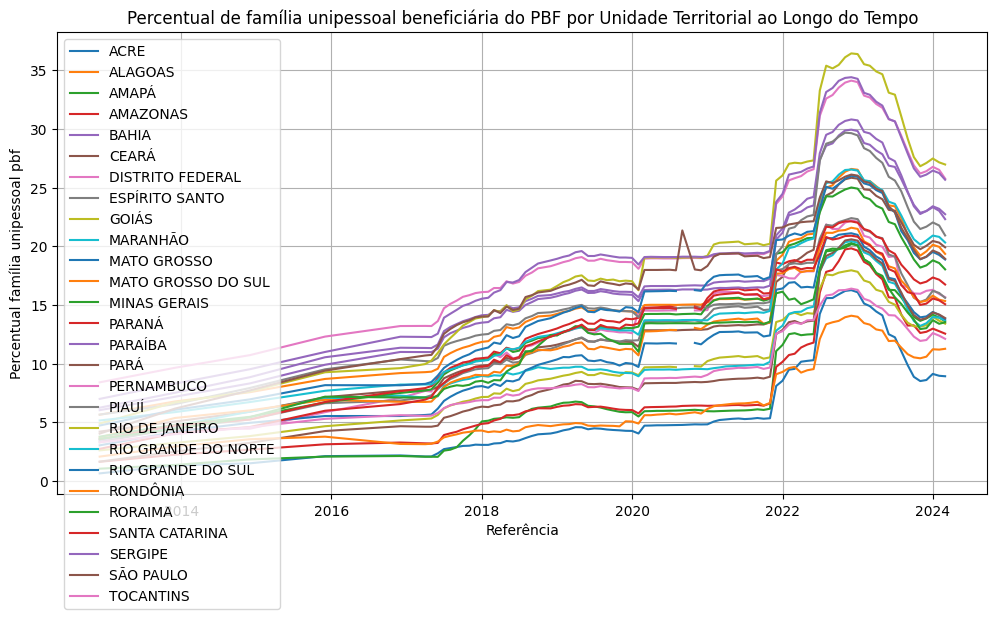

In [48]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Iterando sobre cada 'Unidade Territorial'
for território, dados_território in pbf_unip_estadual.groupby('Unidade Territorial'):
    plt.plot(dados_território['Referência'], dados_território['Percentual fam unip pbf'], label=território)

# Adicionando título e rótulos aos eixos
plt.title('Percentual de família unipessoal beneficiária do PBF por Unidade Territorial ao Longo do Tempo')
plt.xlabel('Referência')
plt.ylabel('Percentual família unipessoal pbf')
plt.legend()
plt.grid(True)

plt.show()

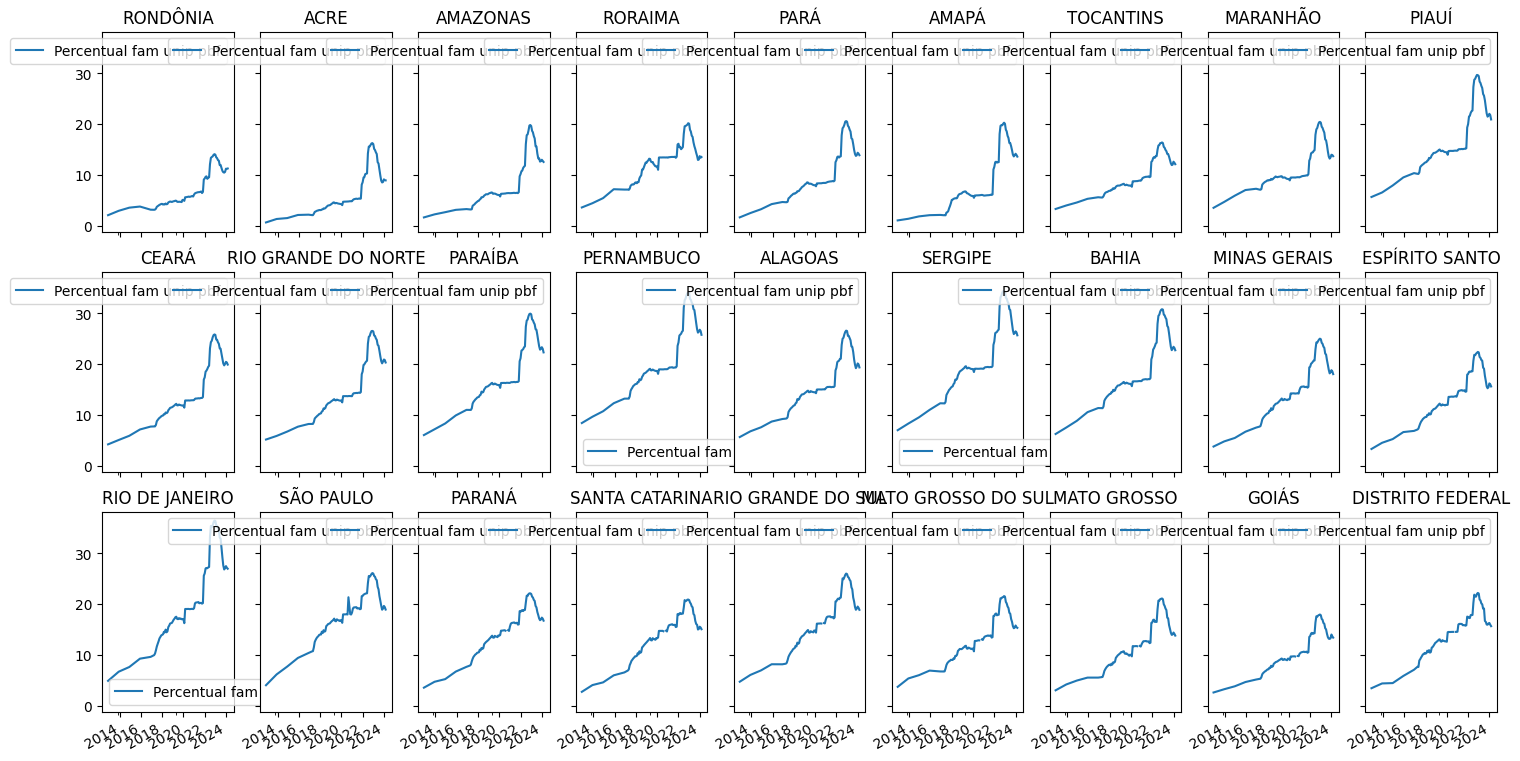

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Obter lista de unidades territoriais únicas
unidades_territoriais = pbf_unip_estadual['Unidade Territorial'].unique()

# Criar uma matriz de 3x9 para os subplots
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(18, 10), sharex=True, sharey=True)

# Iterar sobre cada unidade territorial e plotar um gráfico para cada uma delas
for idx, territorial in enumerate(unidades_territoriais):
    row = idx // 9  # Calcula a linha atual
    col = idx % 9   # Calcula a coluna atual
    ax = axes[row, col]  # Obtém o subplot atual
    
    # Filtrar os dados para a unidade territorial atual
    data = pbf_unip_estadual[pbf_unip_estadual['Unidade Territorial'] == territorial]
    
    # Plotar o gráfico de linhas para a unidade territorial atual
    data.plot(kind='line', x='Referência', y='Percentual fam unip pbf', ax=ax, title=territorial)
    
    # Remover rótulos do eixo x e y para manter o layout limpo
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar o layout
#plt.tight_layout()

plt.show()

In [50]:
#criando arquivo csv final
pbf_unip_estadual.to_csv('D:/docs_mariana/ProjetosGit/Convergencia/pbf_unip_est.csv', encoding='UTF-8')

In [51]:
import pandas as pd

# Corrigindo o caminho do arquivo
rf_fem_pbf = r'D:\docs_mariana\ProjetosGit\Convergencia\rf_fem_pbf.csv'

# Carregando o arquivo CSV
rf_fam_pbf = pd.read_csv(rf_fem_pbf, sep=',', encoding='latin-1')

# Visualizando as primeiras linhas para verificar se foi carregado corretamente
rf_fam_pbf.head()

,Código,Unidade Territorial,Referência,Pessoas do sexo feminino PBF,Porcentagem de Pessoas do Sexo Feminino,Responsável Familiar (PBF) - Feminino,Valor repassado a famílias com RF Feminino,Porcentagem de Responsáveis Familiares do Sexo Feminino
0,11,RONDÔNIA,12/2013,NaN,NaN,108921,NaN,"92,4"
1,12,ACRE,12/2013,NaN,NaN,70566,NaN,"90,4"
2,13,AMAZONAS,12/2013,NaN,NaN,324680,NaN,"90,5"
3,14,RORAIMA,12/2013,NaN,NaN,41107,NaN,"88,0"
4,15,PARÁ,12/2013,NaN,NaN,787711,NaN,"91,5"


In [52]:
rf_fam_pbf.columns

Index(['Código', 'Unidade Territorial', 'Referência',
       'Pessoas do sexo feminino PBF',
       'Porcentagem de Pessoas do Sexo Feminino',
       'Responsável Familiar (PBF) - Feminino',
       'Valor repassado a famílias com RF Feminino',
       'Porcentagem de Responsáveis Familiares do Sexo Feminino'],
      dtype='object')

In [53]:
rf_fam_pbf = rf_fam_pbf.drop(columns=['Código', 'Pessoas do sexo feminino PBF',
       'Porcentagem de Pessoas do Sexo Feminino',
       'Responsável Familiar (PBF) - Feminino',
       'Valor repassado a famílias com RF Feminino'])

In [54]:
rf_fam_pbf.columns

Index(['Unidade Territorial', 'Referência',
       'Porcentagem de Responsáveis Familiares do Sexo Feminino'],
      dtype='object')

In [55]:
rf_fam_pbf = rf_fam_pbf.rename(columns={'Porcentagem de Responsáveis Familiares do Sexo Feminino': 
                                                      'Perc RF fam PBF'})

In [56]:
rf_fam_pbf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unidade Territorial  2943 non-null   object
 1   Referência           2943 non-null   object
 2   Perc RF fam PBF      2943 non-null   object
dtypes: object(3)
memory usage: 69.1+ KB


In [57]:
rf_fam_pbf['Perc RF fam PBF'] = pd.to_numeric(rf_fam_pbf['Perc RF fam PBF'].str.replace(',', '.'))

In [58]:
rf_fam_pbf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unidade Territorial  2943 non-null   object 
 1   Referência           2943 non-null   object 
 2   Perc RF fam PBF      2943 non-null   float64
dtypes: float64(1), object(2)
memory usage: 69.1+ KB


In [59]:
rf_fam_pbf['Referência'] = pd.to_datetime(rf_fam_pbf['Referência'], format='%m/%Y')

In [60]:
rf_fam_pbf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unidade Territorial  2943 non-null   object        
 1   Referência           2943 non-null   datetime64[ns]
 2   Perc RF fam PBF      2943 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 69.1+ KB


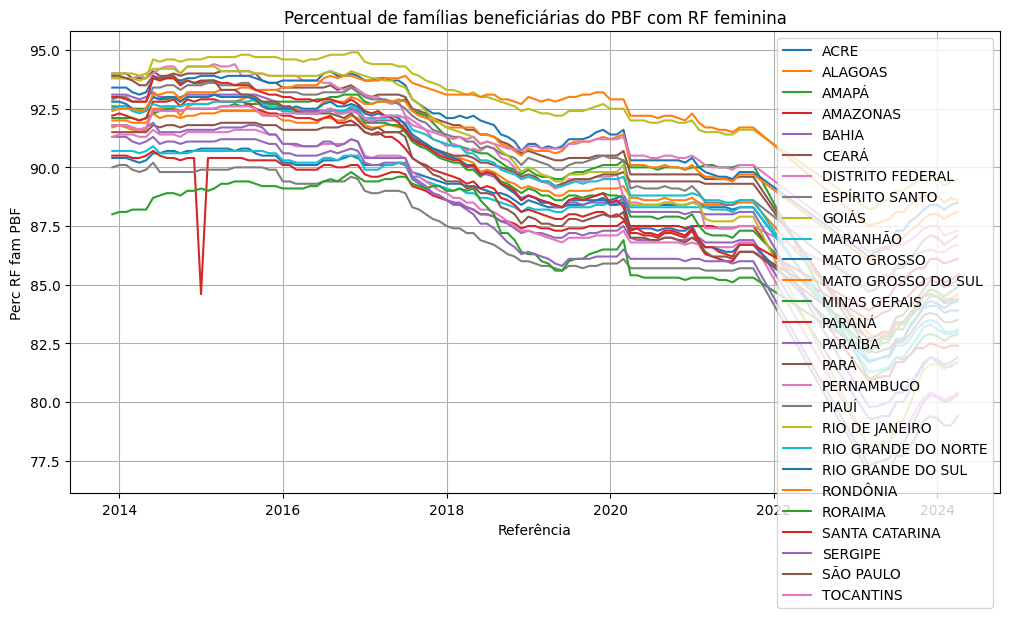

In [61]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Iterando sobre cada 'Unidade Territorial'
for território, dados_território in rf_fam_pbf.groupby('Unidade Territorial'):
    plt.plot(dados_território['Referência'], dados_território['Perc RF fam PBF'], label=território)

# Adicionando título e rótulos aos eixos
plt.title('Percentual de famílias beneficiárias do PBF com RF feminina')
plt.xlabel('Referência')
plt.ylabel('Perc RF fam PBF')
plt.legend()
plt.grid(True)

plt.show()

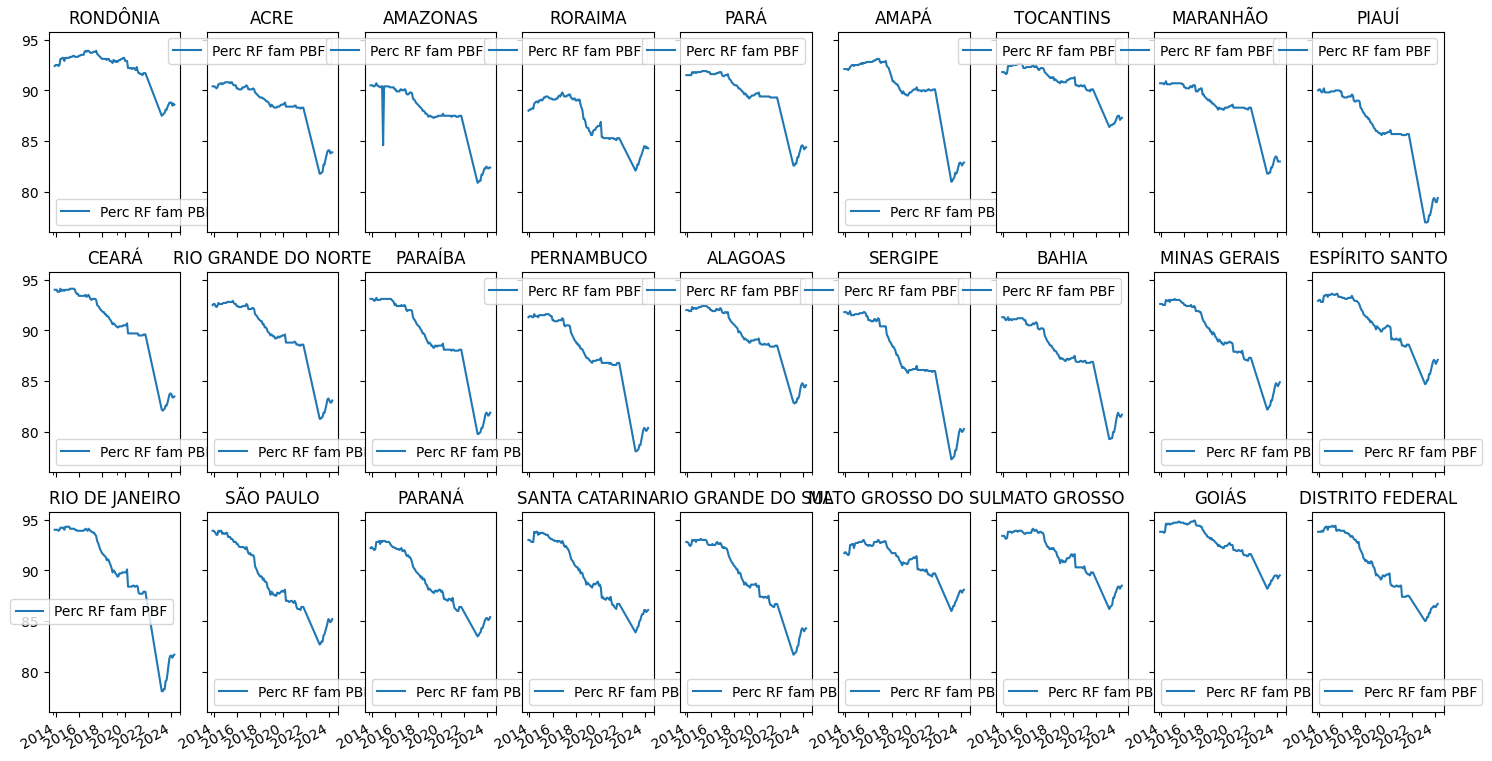

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Obter lista de unidades territoriais únicas
unidades_territoriais = rf_fam_pbf['Unidade Territorial'].unique()

# Criar uma matriz de 3x9 para os subplots
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(18, 10), sharex=True, sharey=True)

# Iterar sobre cada unidade territorial e plotar um gráfico para cada uma delas
for idx, territorial in enumerate(unidades_territoriais):
    row = idx // 9  # Calcula a linha atual
    col = idx % 9   # Calcula a coluna atual
    ax = axes[row, col]  # Obtém o subplot atual
    
    # Filtrar os dados para a unidade territorial atual
    data = rf_fam_pbf[rf_fam_pbf['Unidade Territorial'] == territorial]
    
    # Plotar o gráfico de linhas para a unidade territorial atual
    data.plot(kind='line', x='Referência', y='Perc RF fam PBF', ax=ax, title=territorial)
    
    # Remover rótulos do eixo x e y para manter o layout limpo
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar o layout
#plt.tight_layout()

plt.show()

In [85]:
#criando arquivo csv final
rf_fam_pbf.to_csv('D:/docs_mariana/ProjetosGit/Convergencia/rf_fam_pbf_est.csv', encoding='UTF-8')

In [117]:
# Corrigindo o caminho do arquivo
fomento_mulher = r'D:\docs_mariana\ProjetosGit\Convergencia\fomento_mulher.csv'

# Carregando o arquivo CSV
fomento_mulher = pd.read_csv(fomento_mulher, sep=',', encoding='latin-1')

# Visualizando as primeiras linhas para verificar se foi carregado corretamente
fomento_mulher.head()

,Código,Unidade Territorial,Referência,Nº de mulheres beneficiárias do Programa Fomento Rural,Nº de homens beneficiários do Programa Fomento Rural,Nº de beneficiários do Programa Fomento Rural sem informação de sexo,Nº total de beneficiários do Programa Fomento Rural
0,11,RONDÔNIA,01/2012,0,0,0,0
1,12,ACRE,01/2012,0,0,0,0
2,13,AMAZONAS,01/2012,0,0,0,0
3,14,RORAIMA,01/2012,0,0,0,0
4,15,PARÁ,01/2012,0,0,0,0


In [118]:
fomento_mulher['Referência'] = pd.to_datetime(fomento_mulher['Referência'], format='%m/%Y')

In [119]:
fomento_mulher.columns

Index(['Código', 'Unidade Territorial', 'Referência',
       'Nº de mulheres beneficiárias do Programa Fomento Rural',
       'Nº de homens beneficiários do Programa Fomento Rural',
       'Nº de beneficiários do Programa Fomento Rural sem informação de sexo',
       'Nº total de beneficiários do Programa Fomento Rural'],
      dtype='object')

In [120]:
fomento_mulher = fomento_mulher.drop(columns=['Código', 'Nº de homens beneficiários do Programa Fomento Rural',
       'Nº de beneficiários do Programa Fomento Rural sem informação de sexo'])

In [121]:
fomento_mulher.head()

,Unidade Territorial,Referência,Nº de mulheres beneficiárias do Programa Fomento Rural,Nº total de beneficiários do Programa Fomento Rural
0,RONDÔNIA,2012-01-01,0,0
1,ACRE,2012-01-01,0,0
2,AMAZONAS,2012-01-01,0,0
3,RORAIMA,2012-01-01,0,0
4,PARÁ,2012-01-01,0,0


In [122]:
import pandas as pd

# Extrair o ano da coluna "Referência"
fomento_mulher['Ano'] = fomento_mulher['Referência'].dt.year

# Agrupar os dados pela unidade territorial, ano e calcular as somas
somas_por_ano = fomento_mulher.groupby(['Unidade Territorial', 'Ano']).agg({
    'Nº de mulheres beneficiárias do Programa Fomento Rural': 'sum',
    'Nº total de beneficiários do Programa Fomento Rural': 'sum'
}).reset_index()

# Renomear as colunas com as somas
somas_por_ano.columns = ['Unidade Territorial', 'Ano', 
                         'Soma de mulheres beneficiárias', 
                         'Soma total de beneficiários']

# Juntar as somas ao DataFrame original com base na unidade territorial e no ano
fomento_mulher = fomento_mulher.merge(somas_por_ano, on=['Unidade Territorial', 'Ano'])

fomento_mulher.tail()




,Unidade Territorial,Referência,Nº de mulheres beneficiárias do Programa Fomento Rural,Nº total de beneficiários do Programa Fomento Rural,Ano,Soma de mulheres beneficiárias,Soma total de beneficiários
3883,DISTRITO FEDERAL,2023-08-01,2,3,2023,9,13
3884,DISTRITO FEDERAL,2023-09-01,0,0,2023,9,13
3885,DISTRITO FEDERAL,2023-10-01,0,0,2023,9,13
3886,DISTRITO FEDERAL,2023-11-01,0,0,2023,9,13
3887,DISTRITO FEDERAL,2023-12-01,0,0,2023,9,13


In [123]:
fomento_mulher.columns

Index(['Unidade Territorial', 'Referência',
       'Nº de mulheres beneficiárias do Programa Fomento Rural',
       'Nº total de beneficiários do Programa Fomento Rural', 'Ano',
       'Soma de mulheres beneficiárias', 'Soma total de beneficiários'],
      dtype='object')

In [124]:
fomento_mulher = fomento_mulher.drop(columns=['Referência',
       'Nº de mulheres beneficiárias do Programa Fomento Rural',
       'Nº total de beneficiários do Programa Fomento Rural'])

In [125]:
fomento_mulher.head()

,Unidade Territorial,Ano,Soma de mulheres beneficiárias,Soma total de beneficiários
0,RONDÔNIA,2012,0,0
1,RONDÔNIA,2012,0,0
2,RONDÔNIA,2012,0,0
3,RONDÔNIA,2012,0,0
4,RONDÔNIA,2012,0,0


In [126]:
fomento_mulher.columns

Index(['Unidade Territorial', 'Ano', 'Soma de mulheres beneficiárias',
       'Soma total de beneficiários'],
      dtype='object')

In [127]:
# Nome das colunas
coluna1 = 'Soma de mulheres beneficiárias'
coluna2 = 'Soma total de beneficiários'

# Calcula o percentual da coluna1 em relação à coluna2
fomento_mulher['% mulheres Fomento'] = ((fomento_mulher[coluna1] / fomento_mulher[coluna2]) * 100).round(2)

In [128]:
fomento_mulher.tail()

,Unidade Territorial,Ano,Soma de mulheres beneficiárias,Soma total de beneficiários,% mulheres Fomento
3883,DISTRITO FEDERAL,2023,9,13,69.23
3884,DISTRITO FEDERAL,2023,9,13,69.23
3885,DISTRITO FEDERAL,2023,9,13,69.23
3886,DISTRITO FEDERAL,2023,9,13,69.23
3887,DISTRITO FEDERAL,2023,9,13,69.23


In [129]:
fomento_mulher.columns

Index(['Unidade Territorial', 'Ano', 'Soma de mulheres beneficiárias',
       'Soma total de beneficiários', '% mulheres Fomento'],
      dtype='object')

In [130]:
fomento_mulher = fomento_mulher.drop(columns=['Soma de mulheres beneficiárias',
       'Soma total de beneficiários'])

In [131]:
fomento_mulher.columns

Index(['Unidade Territorial', 'Ano', '% mulheres Fomento'], dtype='object')

In [132]:
fomento_mulher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unidade Territorial  3888 non-null   object 
 1   Ano                  3888 non-null   int32  
 2   % mulheres Fomento   2568 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 76.1+ KB


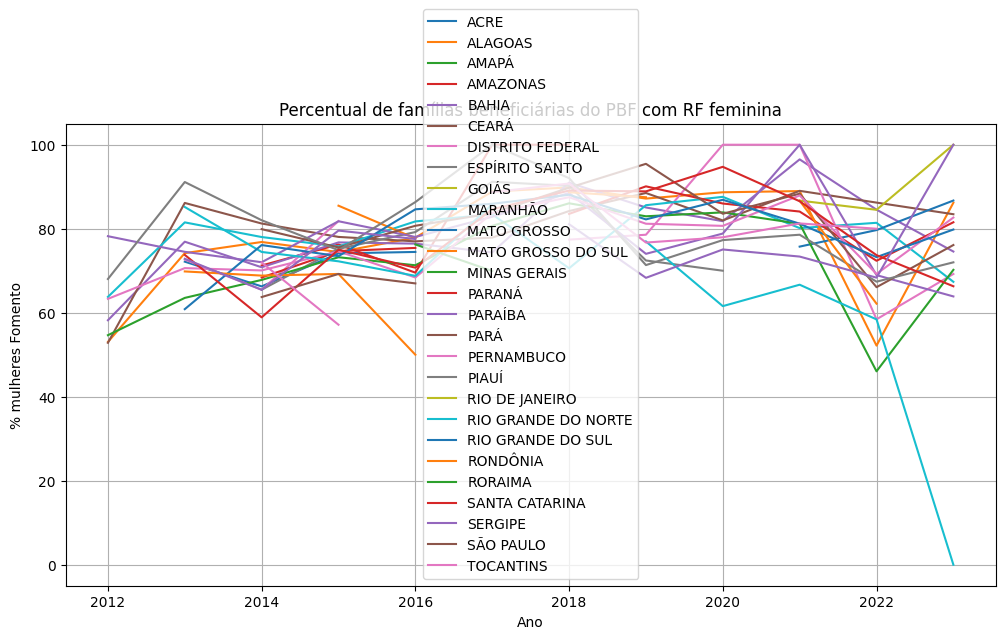

In [133]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Iterando sobre cada 'Unidade Territorial'
for território, dados_território in fomento_mulher.groupby('Unidade Territorial'):
    plt.plot(dados_território['Ano'], dados_território['% mulheres Fomento'], label=território)

# Adicionando título e rótulos aos eixos
plt.title('Percentual de famílias beneficiárias do PBF com RF feminina')
plt.xlabel('Ano')
plt.ylabel('% mulheres Fomento')
plt.legend()
plt.grid(True)

plt.show()

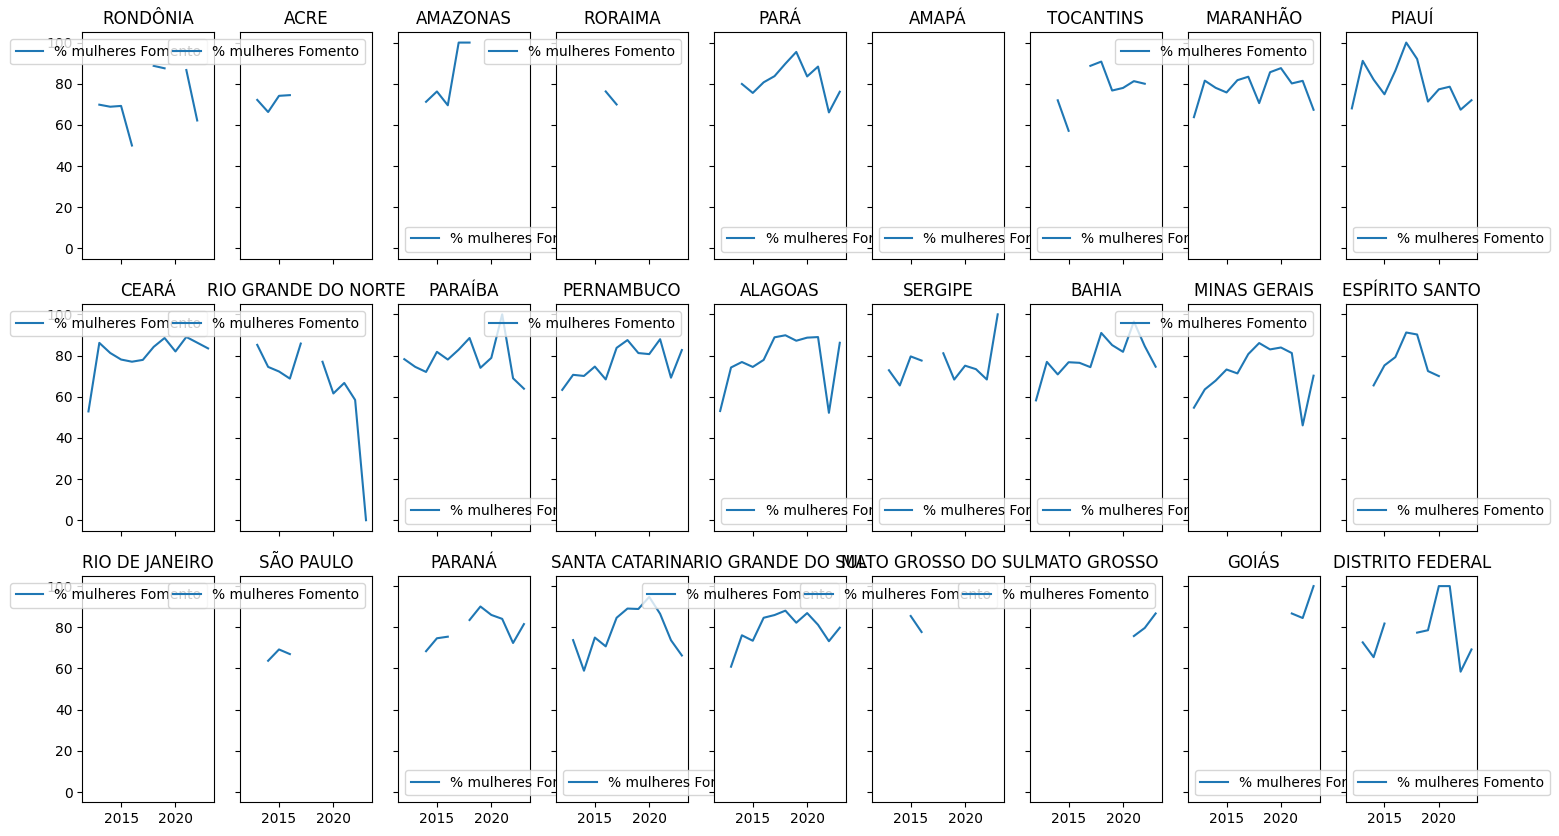

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Obter lista de unidades territoriais únicas
unidades_territoriais = fomento_mulher['Unidade Territorial'].unique()

# Criar uma matriz de 3x9 para os subplots
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(18, 10), sharex=True, sharey=True)

# Iterar sobre cada unidade territorial e plotar um gráfico para cada uma delas
for idx, territorial in enumerate(unidades_territoriais):
    row = idx // 9  # Calcula a linha atual
    col = idx % 9   # Calcula a coluna atual
    ax = axes[row, col]  # Obtém o subplot atual
    
    # Filtrar os dados para a unidade territorial atual
    data = fomento_mulher[fomento_mulher['Unidade Territorial'] == territorial]
    
    # Plotar o gráfico de linhas para a unidade territorial atual
    data.plot(kind='line', x='Ano', y='% mulheres Fomento', ax=ax, title=territorial)
    
    # Remover rótulos do eixo x e y para manter o layout limpo
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar o layout
#plt.tight_layout()

plt.show()